# Running Simulations

## Introduction

This notebook demonstrates how to use the CT simulation tools included in the [pediatricIQphantoms](https://github.com/bnel1201/pediatricIQphantoms) repo and how these tools can be used to build pediatric IQ phantom datasets. These tools were used to generate the [pediatricIQphantoms dataset](https://zenodo.org/doi/10.5281/zenodo.10064035) using the [pediatricIQphantoms.toml](https://github.com/bnel1201/pediatricIQphantoms/blob/main/configs/pediatricIQphantoms.toml) configuration file.

This tutorial will introduce:
1. [individual simulations](#Individual-Simulations) - this section discusses key technique parameters and how to change them
2. [batch mode simulation](#Batch-Mode-Simulations) - this section introduces how to systematically iterate through parameters to build a dataset
3. [command line tool](#Command-Line-Interface-Tool:-make_phantoms) this section combines themes from the previous sections into a command line tool using configuration files consisting of the same technique parameters discussed in sections [individual simulations](#Individual-Simulations) and [batch mode simulation](#Batch-Mode-Simulations)

## Individual Simulations

The main tool for running individual simulations is the [CTobj class](https://github.com/bnel1201/pediatricIQphantoms/blob/4d3eedd4831ca472b9e76776f4e78ef4a04af430/src/pediatricIQphantoms/make_phantoms.py#L12) which both holds the key parameters for running and describing the scan as well as having methods to [run the scan](https://github.com/bnel1201/pediatricIQphantoms/blob/4d3eedd4831ca472b9e76776f4e78ef4a04af430/src/pediatricIQphantoms/make_phantoms.py#L52) and [write the output to dicom](https://github.com/bnel1201/pediatricIQphantoms/blob/4d3eedd4831ca472b9e76776f4e78ef4a04af430/src/pediatricIQphantoms/make_phantoms.py#L82)

In [1]:
from pediatricIQphantoms import CTobj
CTobj?

Init signature:
CTobj(
    phantom='CCT189',
    patient_diameter=200,
    reference_diameter=200,
    reference_fov=340,
    I0=300000.0,
    nb=900,
    na=580,
    ds=1,
    sid=595,
    sdd=1085.6,
    offset_s=1.25,
    down=1,
    has_bowtie=False,
    add_noise=True,
    aec_on=True,
    nx=512,
    fov=340,
    fbp_kernel='hanning,2.05',
    nsims=1,
    relative_lesion_diameter=False,
    age=0,
    patientname='',
    patientid=0,
    studyname='',
    studyid=0,
    seriesname='',
    seriesid=0,
) -> None
Docstring:     
A class to hold CT simulation data and run simulations

:param phantom: phantom object to be scanned, options include ['CCT189', 'CTP404']
:param patient_diameter: Optional, effective diameter in mm. See AAPM TG220 for more details <https://www.aapm.org/pubs/reports/detail.asp?docid=146>
:param reference_diameter: Optional, reference effective diameter in mm for computing automatic exposure control (aec) noise index. For example if a 200 mm reference phanto

As shown in the Class signature above, most attributes have default values provided, these values correspond to a Siemen's Definition AS+ scanner as described in [Zeng et al 2022](https://aapm.onlinelibrary.wiley.com/doi/pdf/10.1002/mp.15430). Thus it can be defined and `run()` with no further initialization attributes. For this example we'll specify the CTP404 phantom and keep all other defaults.

In [2]:
ct = CTobj('CTP404')
ct

<class 'pediatricIQphantoms.make_phantoms.CTobj'> 20.0 cm CTP404 I0: 300000.0

In [3]:
ct.run()
ct





The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ellipse_im: 5 of 10 0.0
ellipse_im: 10 of 10 0.0
ct_sim, simulation: [1/1]
fbp2_back_fan: 74 of 580 0.0
fbp2_back_fan: 147 of 580 0.0
fbp2_back_fan: 219 of 580 0.1
fbp2_back_fan: 292 of 580 0.1
fbp2_back_fan: 367 of 580 0.1
fbp2_back_fan: 439 of 580 0.1
fbp2_back_fan: 512 of 580 0.1


<class 'pediatricIQphantoms.make_phantoms.CTobj'> 20.0 cm CTP404 I0: 300000.0
Recon: (1, 512, 512) 34.0 cm FOV
Projections: (900, 580)

You can access the reconstruction and projection data as numpy arrays via the object attributes:

In [4]:
type(ct.recon), ct.recon.shape, type(ct.projections), ct.projections.shape

(numpy.ndarray, (1, 512, 512), numpy.ndarray, (900, 580))

In [5]:
ct.write_to_dicom?

Signature: ct.write_to_dicom(fname: str | pathlib.Path, groundtruth=False)
Docstring:
write ct data to DICOM file

:param fname: filename to save image to (preferably with `.dcm` or related extension)
:param groundtruth: Optional, whether to save the ground truth phantom image (no noise, blurring, or other artifacts). If True, `self.groundtruth` is saved, if False (default) `self.recon` which contains blurring (and noise if `add_noise`True)
File:      ~/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/make_phantoms.py
Type:      method

In [6]:
fname = ct.write_to_dicom('test.dcm')

import pydicom
dcm = pydicom.read_file(fname[0])
dcm.PatientName

'20.0 cm CTP404'

In [7]:
!pip install ipywidgets -q

In [8]:
import matplotlib.pyplot as plt

from utils import ctshow

The `CTobj` ooject also holds the `groundtruth` attribute following the reconstruction

Text(0.5, 1.0, 'Ground Truth')

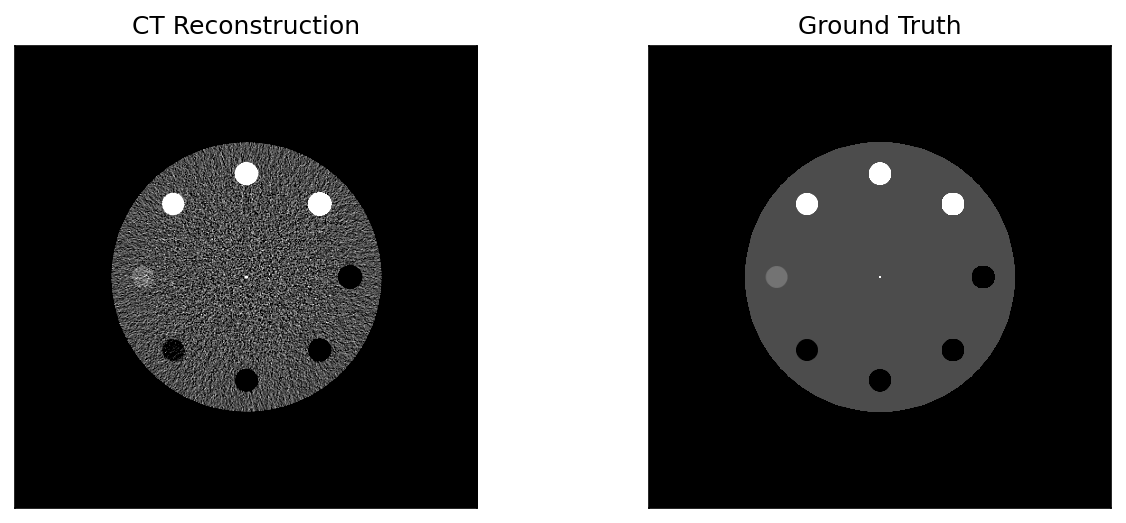

In [9]:
plt.figure(figsize=(10,4), dpi=150)
plt.subplot(1,2,1)
win, lvl = 100, 20
display_settings = (win, lvl)
ctshow(ct.recon[0], display_settings)
plt.title('CT Reconstruction')
plt.subplot(1,2,2)
ctshow(ct.groundtruth, display_settings)
plt.title('Ground Truth')

The `CTobj` ooject also holds the `projections`

Text(0, 0.5, 'detector index')

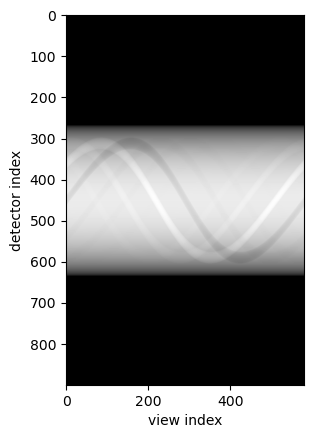

In [10]:
import numpy as np
plt.imshow(-np.log(ct.projections), cmap='gray')
plt.xlabel('view index')
plt.ylabel('detector index')

### Different Phantoms

Here we demonstrate the different phantoms available by defining three CTobj objects each with different phantoms

In [11]:
ctp404 = CTobj('CTP404').run()
cct189 = CTobj('CCT189', I0=3e7).run() # <-- higher dose to show low contrast lesions
uniform = CTobj('uniform').run()







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ellipse_im: 6 of 10 0.0
ct_sim, simulation: [1/1]
fbp2_back_fan: 75 of 580 0.0
fbp2_back_fan: 146 of 580 0.0
fbp2_back_fan: 218 of 580 0.1
fbp2_back_fan: 290 of 580 0.1
fbp2_back_fan: 361 of 580 0.1
fbp2_back_fan: 434 of 580 0.1
fbp2_back_fan: 508 of 580 0.1
fbp2_back_fan: 579 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in d

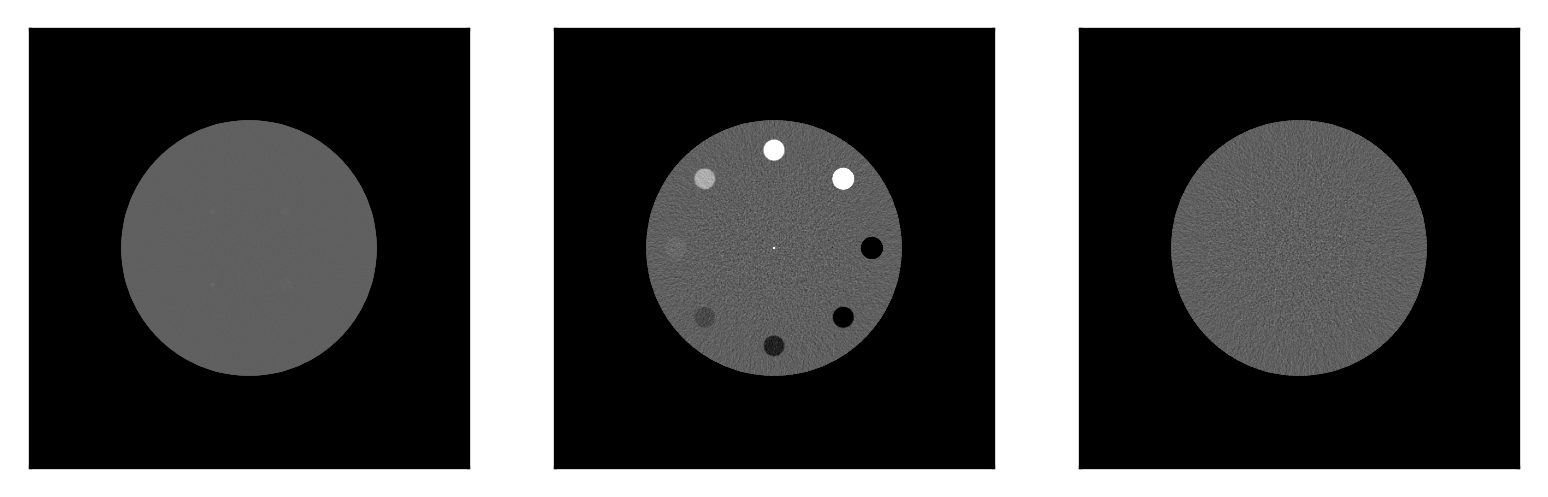

In [12]:
plt.figure(dpi=300)

display_settings =  'soft tissues'

plt.subplot(1,3,1)
ctshow(cct189.recon, display_settings)

plt.subplot(1,3,2)
ctshow(ctp404.recon)

plt.subplot(1,3,3)
ctshow(uniform.recon, display_settings)
plt.show()

### Different Dose Levels

Next let's run a simulation using the `Uniform` phantom but scanned at different dose levels to see how noise trends compare with increasing dose level

In [13]:
import numpy as np
doses = np.linspace(1e5, 8e5, 50)
doses = np.linspace(1e5, 8e5, 3)

res_list = [CTobj('Uniform', I0=I0, nsims=2).run() for I0 in doses]







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/2]
fbp2_back_fan: 73 of 580 0.0
fbp2_back_fan: 147 of 580 0.0
fbp2_back_fan: 220 of 580 0.1
fbp2_back_fan: 292 of 580 0.1
fbp2_back_fan: 365 of 580 0.1
fbp2_back_fan: 439 of 580 0.1
fbp2_back_fan: 512 of 580 0.1
ct_sim, simulation: [2/2]
fbp2_back_fan: 73 of 580 0.0
fbp2_back_fan: 146 of 580 0.0
fbp2_back_fan: 219 of 580 0.1
fbp2_back_fan: 292 of 580 0.1
fbp2_back_fan: 366 of 580 0.1
fbp2_back_fan: 438 of 580 0.1
fbp2_back_fan: 510 of 580 0.1






The variable "irtdir" is not 

In [14]:
res_list

[<class 'pediatricIQphantoms.make_phantoms.CTobj'> 20.0 cm Uniform I0: 100000.0
 Recon: (2, 512, 512) 34.0 cm FOV
 Projections: (900, 580),
 <class 'pediatricIQphantoms.make_phantoms.CTobj'> 20.0 cm Uniform I0: 450000.0
 Recon: (2, 512, 512) 34.0 cm FOV
 Projections: (900, 580),
 <class 'pediatricIQphantoms.make_phantoms.CTobj'> 20.0 cm Uniform I0: 800000.0
 Recon: (2, 512, 512) 34.0 cm FOV
 Projections: (900, 580)]

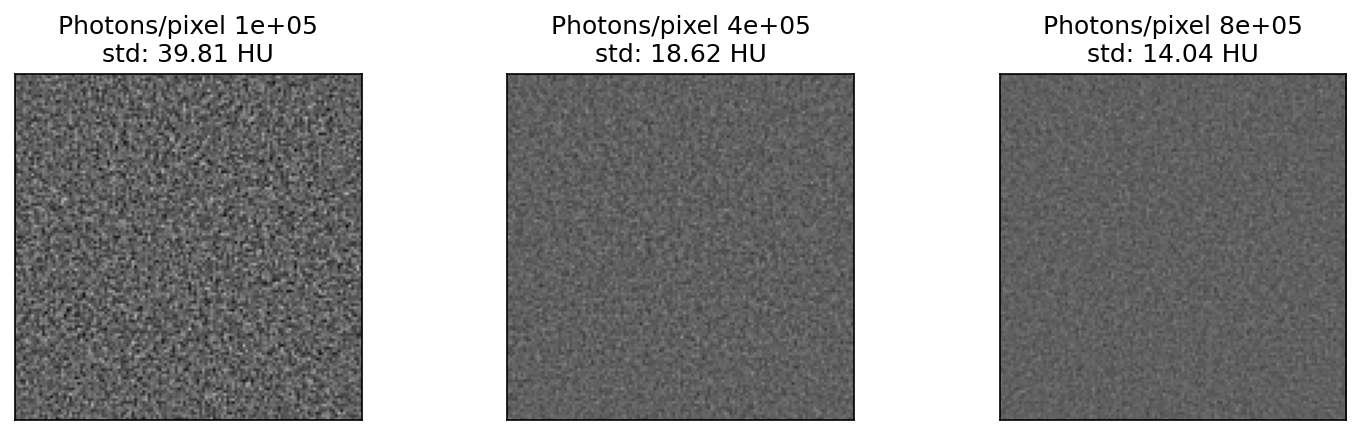

In [15]:
nres = 3
std_noise = []
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    nz, nx, ny = res.recon.shape
    if idx//3 == 0:
        plt.subplot(1, nres, idx+1)
        ctshow(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8], 'soft tissues')
    nz, nx, ny = res.recon.shape
    std_noise.append(res.recon[0, nx//2-nx//8:nx//2+nx//8, nx//2-nx//8:nx//2+nx//8].std())
    plt.title(f'Photons/pixel {doses[idx]:1.1g}\nstd: {std_noise[idx]:2.2f} HU')

Text(0.5, 0, 'Dose Level [%]')

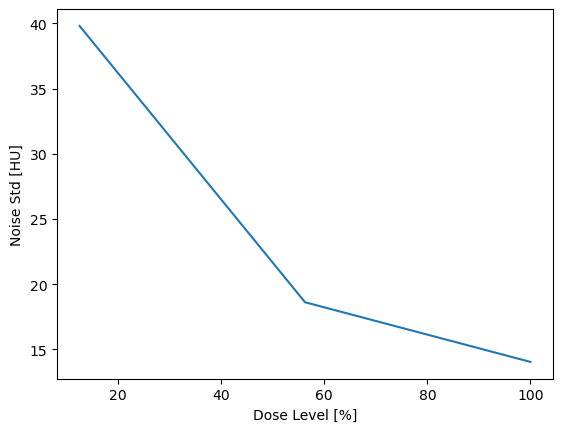

In [16]:
rel_doses = doses/doses.max()*100
plt.plot(rel_doses, std_noise)
plt.ylabel('Noise Std [HU]')
plt.xlabel('Dose Level [%]')

In [17]:
from pathlib import Path
writedir=Path('data/test')
fnames=[]
for res in res_list:
    fname = res.write_to_dicom(writedir / f'{res.seriesname}.dcm')
    fnames += fname
fnames

[PosixPath('data/test/20.0 cm Uniform I0: 100000.0_000.dcm'),
 PosixPath('data/test/20.0 cm Uniform I0: 100000.0_001.dcm'),
 PosixPath('data/test/20.0 cm Uniform I0: 450000.0_000.dcm'),
 PosixPath('data/test/20.0 cm Uniform I0: 450000.0_001.dcm'),
 PosixPath('data/test/20.0 cm Uniform I0: 800000.0_000.dcm'),
 PosixPath('data/test/20.0 cm Uniform I0: 800000.0_001.dcm')]

### Recon Type

In MIRT convolution kernels are specified as `<window function>,<cutoff frequency mm>` for example a typical sharp kernel can be defined as 'hanning,2.05' where a [Hann window](https://en.wikipedia.org/wiki/Hann_function) with a cuffoff ([MTF](https://www.sciencedirect.com/topics/physics-and-astronomy/modulation-transfer-function#:~:text=The%20modulation%20transfer%20function%20(MTF,gets%20transferred%20to%20the%20image.)=0) frequency of 2.05 mm. The table below provides a few Siemen's equivalent kernels based upon matching 50% and 10% MTF cutoffs ([Zeng et al 2022](http://onlinelibrary.wiley.com/doi/abs/10.1002/mp.15430)).

| Description | MIRT         | Siemen's Equivalent |
|:-----------:|--------------|---------------------|
| Sharp       | hanning,2.05 | D45                 |
| Smooth      | hanning,0.85 | B30               

The following experiment runs simulations on increasingly higher cutoff frequency kernels ranging from smooth to sharp.  |

In [18]:
cutoff_freq = [0.5, 0.85, 2.05]

res_list = [CTobj('CCT189', I0=1e6, fbp_kernel=f'hanning,{freq:1.2f}').run() for freq in cutoff_freq]    







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 73 of 580 0.0
fbp2_back_fan: 146 of 580 0.0
fbp2_back_fan: 219 of 580 0.1
fbp2_back_fan: 292 of 580 0.1
fbp2_back_fan: 366 of 580 0.1
fbp2_back_fan: 438 of 580 0.1
fbp2_back_fan: 512 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_

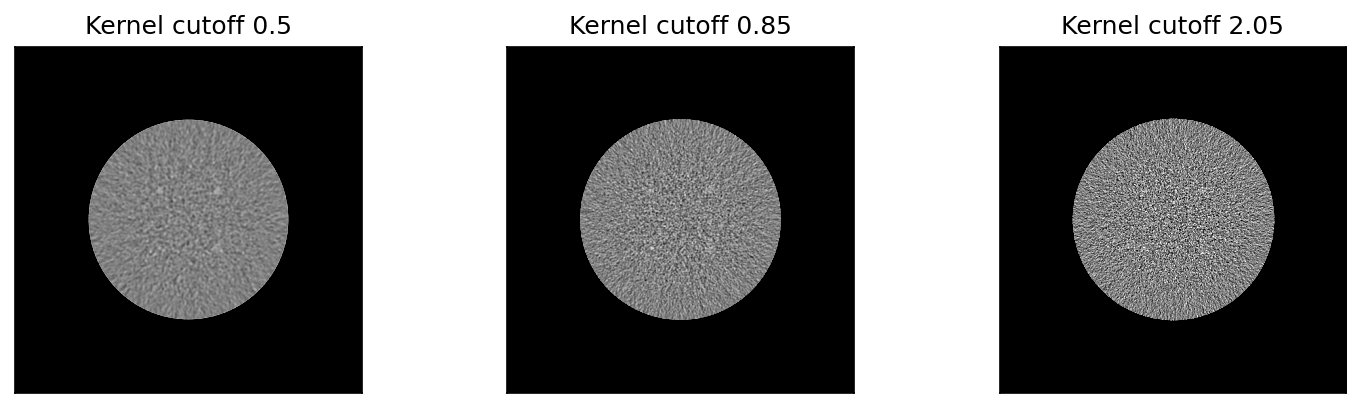

In [19]:
nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, (40, 0))
    plt.title(f'Kernel cutoff {cutoff_freq[idx]}')

### Phantom Size and FOV

Finally let's see how noise texture changes as a result of imaging different sized phantoms with body fitting field of views (FOV)s.

In [20]:
phantom_diameters = [112, 185, 292]

res_list = [CTobj('CCT189', I0=1e6, patient_diameter=d).run() for d in phantom_diameters]   







The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 77 of 580 0.0
fbp2_back_fan: 153 of 580 0.0
fbp2_back_fan: 230 of 580 0.1
fbp2_back_fan: 306 of 580 0.1
fbp2_back_fan: 382 of 580 0.1
fbp2_back_fan: 459 of 580 0.1
fbp2_back_fan: 537 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_

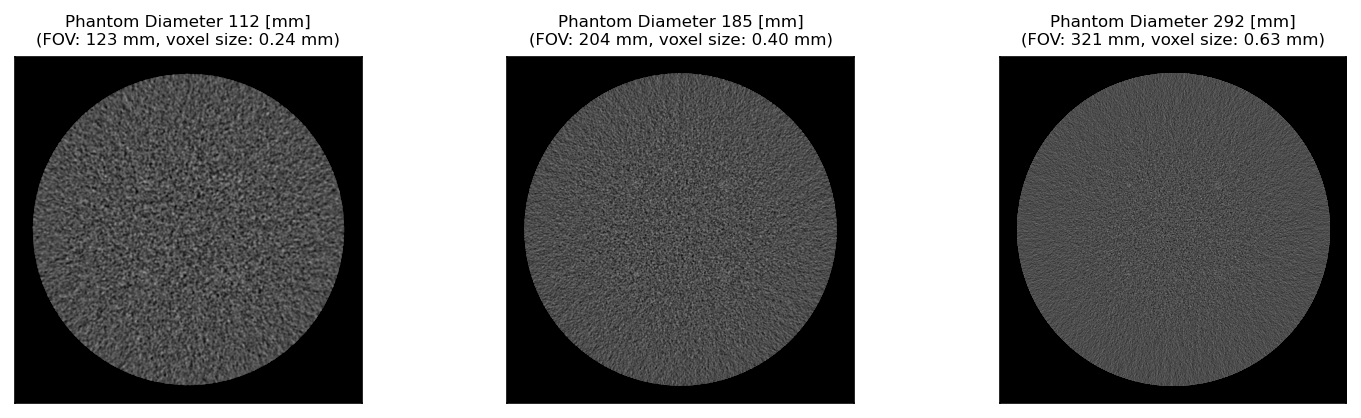

In [21]:
fov = np.array(phantom_diameters)*1.1 # in mm
dx = fov/res.recon.shape[-1]

nres = len(res_list)
plt.figure(figsize=(nres*4, nres), dpi=150)
for idx, res in enumerate(res_list):
    plt.subplot(1, nres, idx+1)
    ctshow(res.recon, 'liver')
    plt.title(f'Phantom Diameter {phantom_diameters[idx]} [mm]\n(FOV: {fov[idx]:2.0f} mm, voxel size: {dx[idx]:2.2f} mm)', fontsize=8)

By default when FOV is not specified, it defaults to a body fitting 1.1x the phantom diameter. Note how FOV changes the relative pixel size

## Batch Mode Simulations

The following introduces how to interactively construct batch simulations in a python environment using [`run_batch_sim`](https://github.com/bnel1201/pediatricIQphantoms/blob/4d3eedd4831ca472b9e76776f4e78ef4a04af430/src/pediatricIQphantoms/make_phantoms.py#L178)

In [22]:
from pediatricIQphantoms import run_batch_sim

In [23]:
run_batch_sim?

Signature:
run_batch_sim(
    image_directory: str,
    model=['CCT189'],
    diameter=[200],
    reference_diameter=200,
    framework='MIRT',
    nsims=1,
    nangles=580,
    aec_on=True,
    add_noise=True,
    full_dose=300000.0,
    dose_level=[1.0],
    sid=595,
    sdd=1085.6,
    nb=880,
    ds=1,
    offset_s=1.25,
    fov=340,
    image_matrix_size=512,
    fbp_kernel='hanning,2.05',
    has_bowtie=True,
)
Docstring:
Running simulations in batch mode

`run_batch_sim` takes lists of parameters (phantoms, diameters, and dose levels) and iterates through all combinations

:param image_directory: Directory to save simulated outputs
:type image_directory: str
:param model: Optional, select phantom model to simulate current options include ['CCT189', 'CTP404']
:type model: list[str]
:param diameter: Optional, simulated phantom diameter in mm
File:      ~/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/make_phantoms.py
Type:      function

Batch mode can be run by either entering in parameter lists for `model`, `diameter`, or `dose_level`

In [24]:
fnames = run_batch_sim(image_directory='data/interactive_batch', dose_level=[0.1, 0.25, 0.5, 1])
fnames

/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch
CCT189 Simulation series 0/1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/1]
fbp2_back_fan: 72 of 580 0.0
fbp2_back_fan: 144 of 580 0.0
fbp2_back_fan: 213 of 580 0.1
fbp2_back_fan: 286 of 580 0.1
fbp2_back_fan: 359 of 580 0.1
fbp2_back_fan: 432 of 580 0.1
fbp2_back_fan: 505 of 580 0.1
fbp2_back_fan: 577 of 580 0.1






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt in

[PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CCT189/diameter200mm/20.0 cm CCT189_groundtruth.dcm')]

Alternatively, you can load in a config file and change it as needed and then input to `run_batch_sim` using the [`**` operator](https://realpython.com/python-kwargs-and-args/)

In [25]:
import tomli
with open('../tests/configs/test.toml', 'rb') as f:
    config_file = tomli.load(f)
config_file

{'simulation': [{'image_directory': 'results/test',
   'model': ['CCT189', 'CTP404'],
   'diameter': [112, 292],
   'reference_diameter': 200,
   'framework': 'MIRT',
   'nsims': 2,
   'aec_on': True,
   'add_noise': True,
   'full_dose': 300000.0,
   'dose_level': [0.25, 1.0],
   'sid': 595,
   'sdd': 1085.6,
   'nb': 880,
   'nangles': 100,
   'ds': 1,
   'offset_s': 1.25,
   'fov': 340,
   'image_matrix_size': 256,
   'fbp_kernel': 'hanning,2.05'}]}

In [27]:
config_file.keys(), len(config_file['simulation'])

(dict_keys(['simulation']), 1)

Note: the toml config files are structured to allow multiple simulations with updating select parameters in each simulation, see [Documentation/Usage](https://pediatriciqphantoms.readthedocs.io/en/latest/usage.html) for more details.

This for this example, we want to take the first simulation since `run_batch_sim` expects only flat dictionaries, str, float, and int arguments.

In [28]:
config = config_file['simulation'][0]
config

{'image_directory': 'results/test',
 'model': ['CCT189', 'CTP404'],
 'diameter': [112, 292],
 'reference_diameter': 200,
 'framework': 'MIRT',
 'nsims': 2,
 'aec_on': True,
 'add_noise': True,
 'full_dose': 300000.0,
 'dose_level': [0.25, 1.0],
 'sid': 595,
 'sdd': 1085.6,
 'nb': 880,
 'nangles': 100,
 'ds': 1,
 'offset_s': 1.25,
 'fov': 340,
 'image_matrix_size': 256,
 'fbp_kernel': 'hanning,2.05'}

In [29]:
config['image_directory'] = 'data/interactive_batch'
config['dose_level'] = [0.1, 0.25, 0.5, 1]
fnames = run_batch_sim(**config)
fnames

/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch
CCT189 Simulation series 0/2






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/2]
ct_sim, simulation: [2/2]






The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/m

[PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CCT189/diameter112mm/11.2 cm CCT189_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CCT189/diameter292mm/29.2 cm CCT189_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CTP404/diameter112mm/11.2 cm CTP404_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CTP404/diameter292mm/29.2 cm CTP404_groundtruth.dcm')]

## Command Line Interface Tool: `make_phantoms`

Finally, datasets can be made in batch mode using the command line tool [`make_phantoms`](https://github.com/bnel1201/pediatricIQphantoms/blob/4d3eedd4831ca472b9e76776f4e78ef4a04af430/src/pediatricIQphantoms/make_phantoms.py#L224) that should be available globally in your terminal after pip [installing](https://github.com/bnel1201/pediatricIQphantoms?tab=readme-ov-file#start-here) the `pediatricIQphantoms` package.

In [30]:
!make_phantoms -help

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
usage: make_phantoms [-h] [config]

Make Pediatric IQ Phantoms: command line interface

positional arguments:
  config      input is a configuration .toml file containing simulation
              parameters (see configs/defaults.toml as an example)

options:
  -h, --help  show this help message and exit


For this example we will use [test.toml](../tests/configs/test.toml) as quick example

In [31]:
!cat ../tests/configs/test.toml

# test.toml
[[simulation]]

# directories
image_directory = "results/test"
# filetype = '.mhd' # mhd for metaheader or dcm for dicom
# phantoms
model = ['CCT189', 'CTP404'] # <-- current options include [CCT189, CTP404]
diameter = [112, 292] # <-- units in mm
reference_diameter = 200 # <-- diameter in mm of the real physcial phantom for comparison

# acquisition
framework = "MIRT"
nsims = 2 # <-- number of simulations to perform with different noise instantiations
aec_on = true # (aec built in to ped xcat) <-- 'aec' = automatic exposure control, when `true`, it ensures constant noise levels for all `patient_diameters` (see `reference_dose_level` for more info)
add_noise = true # <-- if true adds Poisson noise, noise magnitude set by `reference_dose_level`, noise texture set by reconstructed field of view (cuttently fov = 110# patient_diameter) 
full_dose = 3e5 # <-- units of photons per pixel
dose_level = [0.25, 1.00] # <-- units of photons, this expression is evaluated by matlab, so k

In [32]:
!make_phantoms ../tests/configs/test.toml

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/results/test
CCT189 Simulation series 0/2




The variable "irtdir" is not set, so trying default, assuming
that you launched matlab from the irt install directory.
You may need to edit setup.m or adjust your path otherwise.
Assuming you installed irt in directory "/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/src/pediatricIQphantoms/mirt-main".
Path setup for irt appears to have succeeded.
Warn: sino_geom 154: strip_width=0 is rarely realistic! are you sure?
Warn: sino_geom 156: called from "ct_sim : 26"
ct_sim, simulation: [1/2]
ct_sim, simulation: [2/2]






The variable "irtdir"

## Viewing Images

In [33]:
!tree results/test -P *_000.dcm | head -n 15

results/test
├── CCT189
│   ├── diameter112mm
│   │   ├── dose_025
│   │   │   └── fbp hanning205
│   │   │       └── 11.2 cm CCT189_000.dcm
│   │   └── dose_100
│   │       └── fbp hanning205
│   │           └── 11.2 cm CCT189_000.dcm
│   └── diameter292mm
│       ├── dose_025
│       │   └── fbp hanning205
│       │       └── 29.2 cm CCT189_000.dcm
│       └── dose_100
│           └── fbp hanning205


In [34]:
fnames

[PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CCT189/diameter112mm/11.2 cm CCT189_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CCT189/diameter292mm/29.2 cm CCT189_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CTP404/diameter112mm/11.2 cm CTP404_groundtruth.dcm'),
 PosixPath('/home/brandon.nelson/Dev/Regulatory_Science_Tools/pediatricIQphantoms/notebooks/data/interactive_batch/CTP404/diameter292mm/29.2 cm CTP404_groundtruth.dcm')]

In [35]:
from pathlib import Path
import pandas as pd
base_dir = Path('/gpfs_projects/brandon.nelson/RSTs/pediatricIQphantoms')
metadata = pd.read_csv(base_dir / 'metadata.csv')
metadata.file = metadata.file.apply(lambda o: base_dir / o)

In [36]:
metadata

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
0,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,0
1,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,1
2,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,2
3,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,3
4,11.2 cm CTP404,11.2,0.083333,newborn,CTP404,Siemens Somatom Definition,25.0,fbp,D45,12.3,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,0.0,0,simulation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6755,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,197
6756,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,198
6757,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,93,simulation,199
6758,35.0 cm uniform,35.0,39.000000,adult,uniform,Siemens Somatom Definition,NaN,ground truth,NaN,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,23.0,94,ground truth,0


In [37]:
metadata[metadata.phantom=='MITA-LCD']

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
328,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,0
329,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,1
330,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,2
331,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,3
332,11.2 cm MITA-LCD,11.2,0.083333,newborn,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,12.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,8.0,32,simulation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3539,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,197
3540,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,198
3541,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,100.0,fbp,D45,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,61,simulation,199
3542,35.0 cm MITA-LCD,35.0,39.000000,adult,MITA-LCD,Siemens Somatom Definition,NaN,ground truth,NaN,39.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,15.0,62,ground truth,0


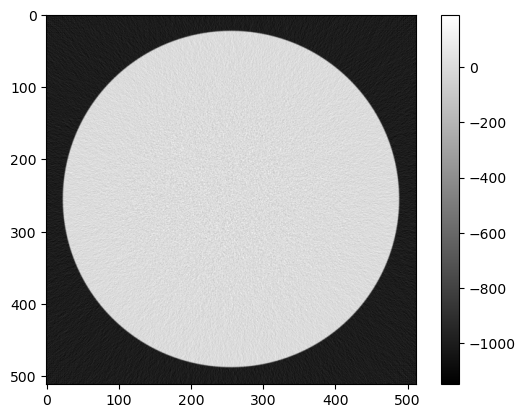

,Name,effective diameter [cm],age [year],pediatric subgroup,phantom,scanner,Dose [%],recon,kernel,FOV [cm],file,patientid,studyid,series,repeat
2740,29.2 cm MITA-LCD,29.2,21.0,adolescent,MITA-LCD,Siemens Somatom Definition,25.0,fbp,D45,32.0,/gpfs_projects/brandon.nelson/RSTs/pediatricIQ...,14.0,56,simulation,0


In [38]:
import matplotlib.pyplot as plt
import pydicom
row = metadata[(metadata['Dose [%]']==25) &
               (metadata['phantom'] == 'MITA-LCD') &
               (metadata['recon'] == 'fbp') &
               (metadata['kernel'] == 'D45') &
               (metadata['FOV [cm]'] == 32.0) &
               (metadata['repeat'] == 0)]
dcm_file = row.file.item()
dcm = pydicom.dcmread(dcm_file)
img = dcm.pixel_array + int(dcm.RescaleIntercept)
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()
row

In [39]:
dcm.ImageType

['ORIGINAL', 'PRIMARY', 'AXIAL']

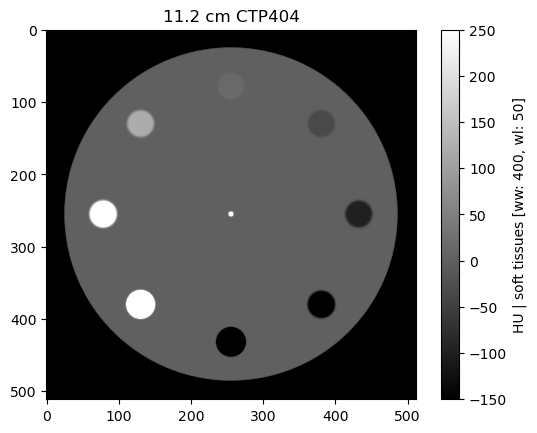

In [40]:
from utils import browse_studies
browse_studies(metadata, phantom='CTP404', fov=12.3, dose=100, recon='noise free', kernel='D45', repeat=0, display='soft tissues')

In [41]:
from utils import study_viewer

In [42]:
study_viewer(metadata)

FOV 12.0 not in [12.3, 14.4, 16.6, 20.4, 23.8, 32.1, 34.0, 38.5]


interactive(children=(Dropdown(description='phantom', options=('CTP404', 'MITA-LCD', 'uniform'), value='CTP404…

### Viewing with Slicer

**Drag and drop the unzipped dataset** into [3D Slicer](https://www.slicer.org/) to automatically load the dataset into [Slicer's DICOM database](https://slicer.readthedocs.io/en/latest/user_guide/modules/dicom.html)

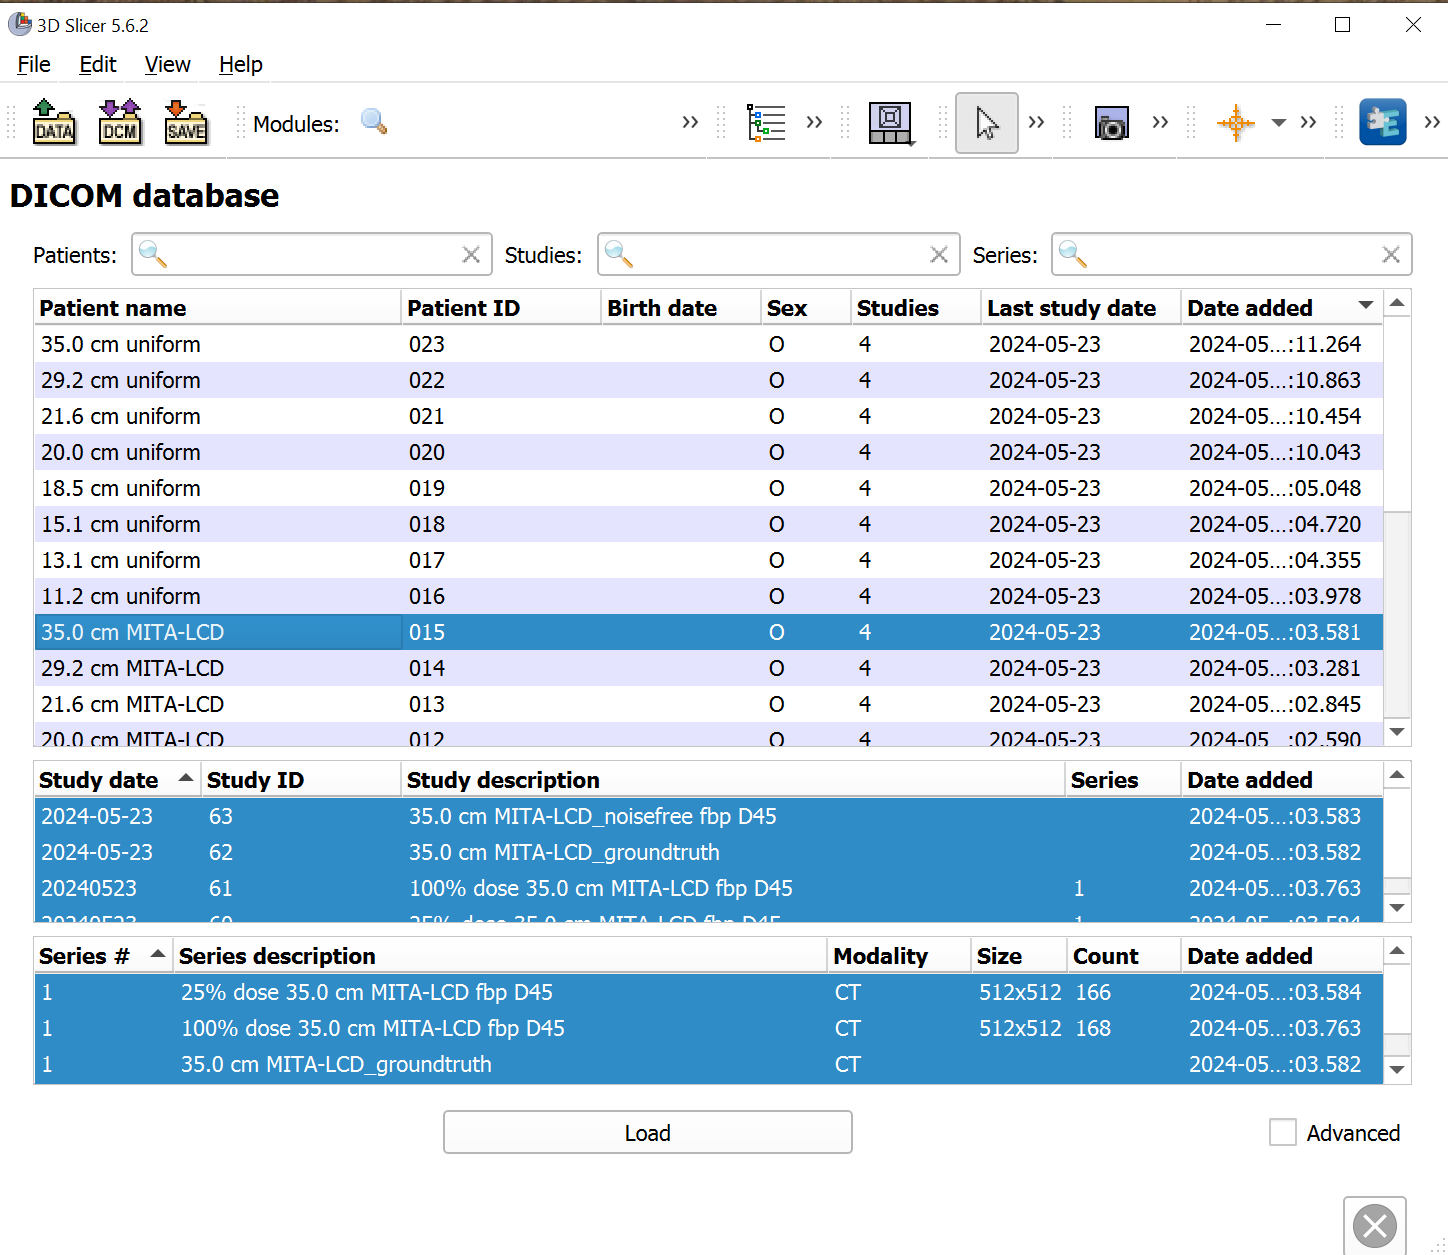

![](slicer_preview.png)

### Radiant (paid)
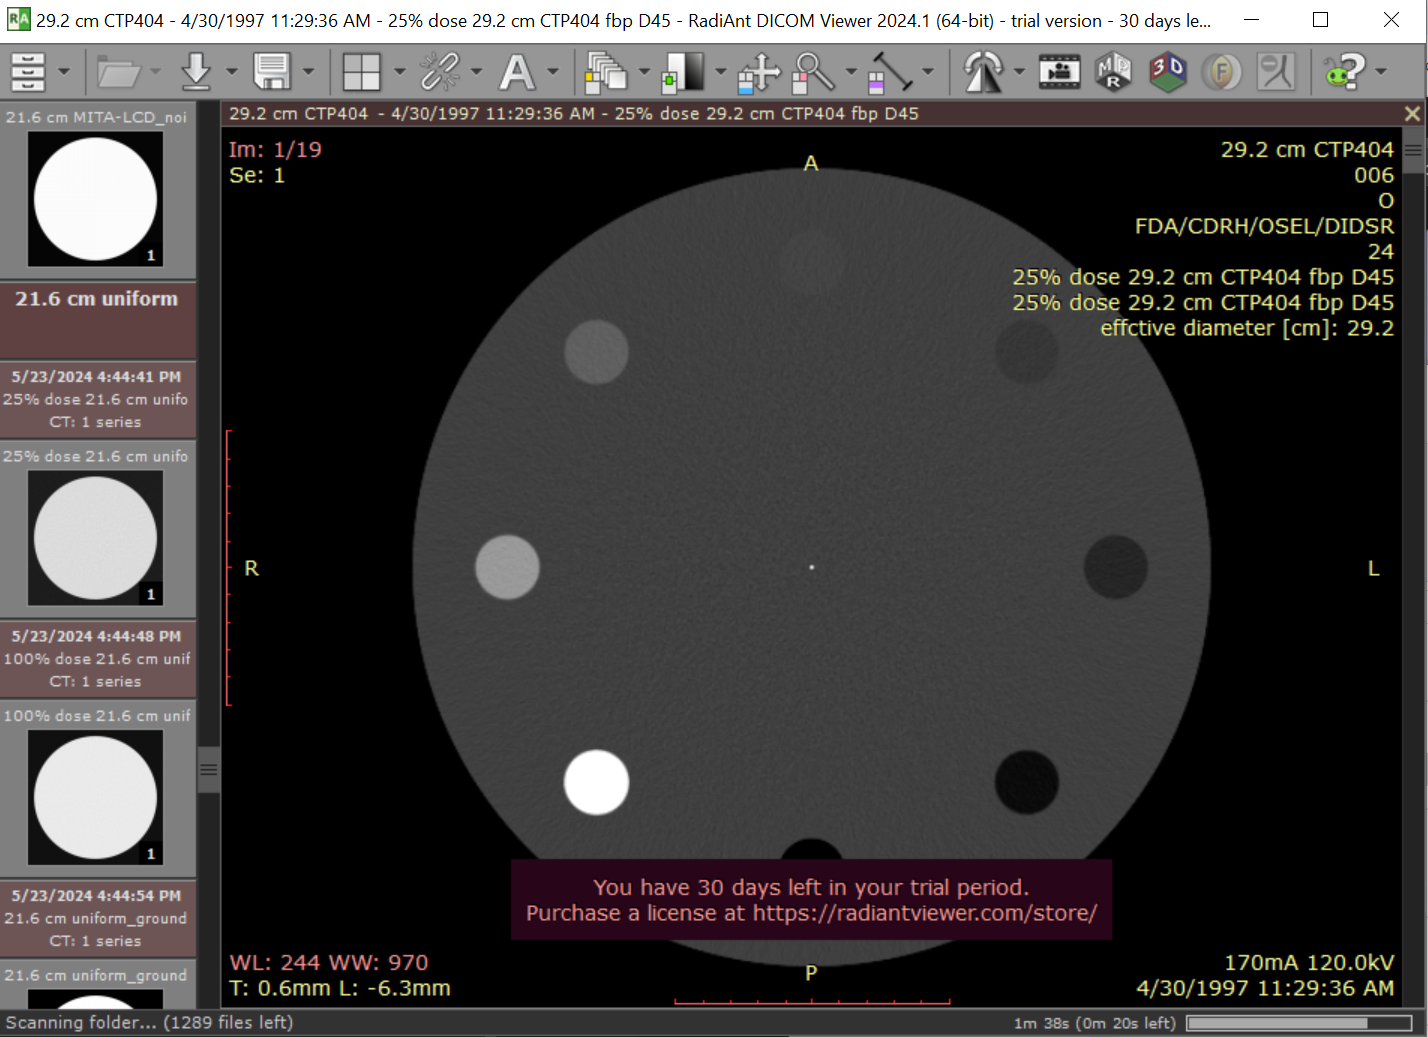

### Other Viewers
1. Radiant (subscription)
2. SNAP ITK
3. ImageJ